## Explorarity Data Analysis 

In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("BigQuery.csv")

# Check for missing values
missing_values = df.isnull().sum()

# Convert 'Year' column to integer type (if it's not already)
df['year_block_added'] = df['year_block_added'].astype(int)

# Count unique miners per year
unique_miners_per_year = df.groupby('year_block_added')['miner_address'].nunique()

# Count unique mining pools per year
#unique_pools_per_year = df.groupby('year_block_added')['Miner Pool Name'].nunique()

# Compute total blocks per year
total_blocks_per_year = df['year_block_added'].value_counts().sort_index()

# Compute average block reward per year
average_reward_per_year = df.groupby('year_block_added')['mining_reward_value'].mean()

# Display results
print("Missing Values per Column:")
print(missing_values, "\n")

print("Unique Miners Per Year:")
print(unique_miners_per_year, "\n")

#print("Unique Mining Pools Per Year:")
#print(unique_pools_per_year, "\n")

print("Total Blocks Per Year:")
print(total_blocks_per_year, "\n")

print("Average Block Reward Per Year:")
print(average_reward_per_year, "\n")


Missing Values per Column:
block_height           0
block_difficulty       0
block_timestamp        0
year_block_added       0
miner_address          0
mining_reward_value    0
dtype: int64 

Unique Miners Per Year:
year_block_added
2014    2474
2015     765
2016     484
2017     191
2018     179
2019     147
2020     148
2021      96
2022      71
2023      72
2024      81
Name: miner_address, dtype: int64 

Total Blocks Per Year:
year_block_added
2014    58860
2015    54321
2016    54851
2017    55928
2018    54498
2019    54232
2020    53222
2021    52686
2022    53188
2023    53999
2024    53456
Name: count, dtype: int64 

Average Block Reward Per Year:
year_block_added
2014    2.381937e+09
2015    2.464025e+09
2016    1.934176e+09
2017    1.427481e+09
2018    1.295215e+09
2019    1.286356e+09
2020    9.011260e+08
2021    6.657333e+08
2022    6.350828e+08
2023    6.683426e+08
2024    4.349986e+08
Name: mining_reward_value, dtype: float64 



## Number of unique miners that received rewards and miner pools per years

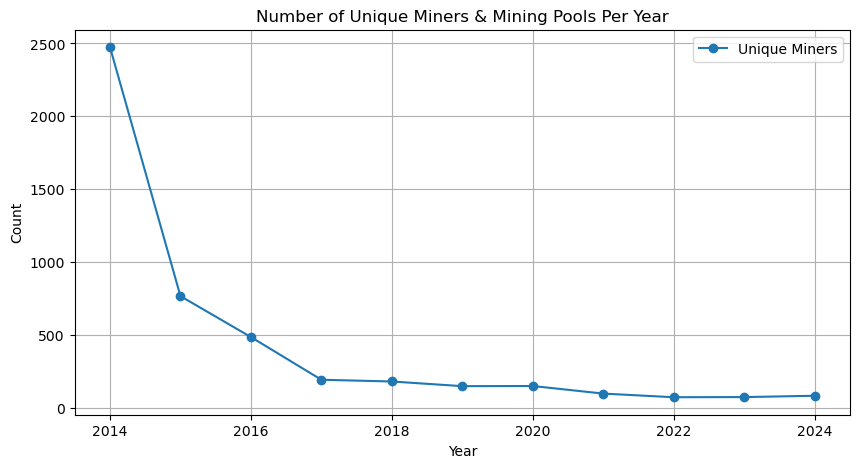

Unique Miners Per Year:
 year_block_added
2014    2474
2015     765
2016     484
2017     191
2018     179
2019     147
2020     148
2021      96
2022      71
2023      72
2024      81
Name: miner_address, dtype: int64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by year and count unique addresses and pools
unique_miners = df.groupby("year_block_added")["miner_address"].nunique()
#unique_pools = df.groupby("year_block_added")["Miner Pool Name"].nunique()

# Plot unique miners and pools per year
plt.figure(figsize=(10, 5))
plt.plot(unique_miners.index, unique_miners.values, marker="o", label="Unique Miners")
#plt.plot(unique_pools.index, unique_pools.values, marker="s", label="Unique Mining Pools")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Number of Unique Miners & Mining Pools Per Year")
plt.legend()
plt.grid()
plt.show()

# Print summary statistics
print("Unique Miners Per Year:\n", unique_miners)
#print("\nUnique Mining Pools Per Year:\n", unique_pools)


## Average of block rewards distrebuted among years

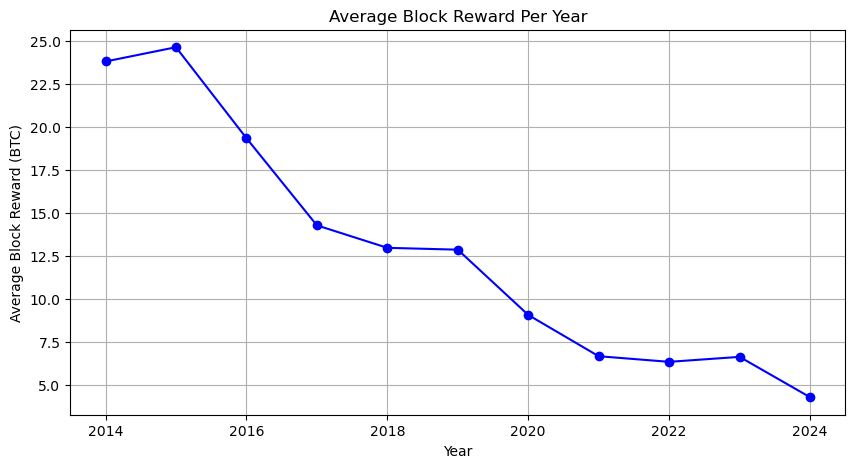

Average Block Reward Per Year:
 Year
2014    23.806908
2015    24.636827
2016    19.346827
2017    14.274139
2018    12.965842
2019    12.858577
2020     9.061922
2021     6.659366
2022     6.332764
2023     6.621632
2024     4.273956
Name: Value, dtype: float64


In [31]:
# Convert 'Value' column to numeric (handle missing or invalid values)
df["Value"] = pd.to_numeric(df["Value"], errors="coerce")

# Group by year and calculate the average reward
average_rewards = df.groupby("Year")["Value"].mean()

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(average_rewards.index, average_rewards.values, marker="o", linestyle="-", color="b")
plt.xlabel("Year")
plt.ylabel("Average Block Reward (BTC)")
plt.title("Average Block Reward Per Year")
plt.grid()
plt.show()

# Print the results
print("Average Block Reward Per Year:\n", average_rewards)

## Top mine pool contribution per year 

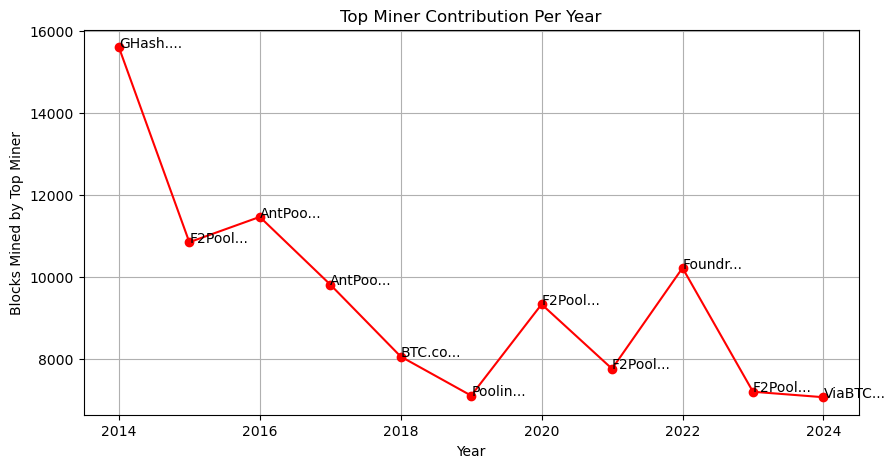

Top Miner Contribution Per Year:
      Year Miner Pool Name  Block_Count
90   2014        GHash.IO        15604
140  2015          F2Pool        10845
169  2016         AntPool        11463
214  2017         AntPool         9812
263  2018         BTC.com         8055
330  2019          Poolin         7101
353  2020          F2Pool         9330
388  2021          F2Pool         7756
426  2022     Foundry USA        10217
451  2023          F2Pool         7196
474  2024          ViaBTC         7062


In [32]:

# Drop rows with missing values in Address column
df = df.dropna(subset=["Address"])

# Count the number of blocks each miner mined per year
miner_counts = df.groupby(["Year", "Miner Pool Name"]).size().reset_index(name="Block_Count")

# Get the top miner for each year
top_miners_per_year = miner_counts.loc[miner_counts.groupby("Year")["Block_Count"].idxmax()]

# Plot the trend of the top miner's contribution
plt.figure(figsize=(10, 5))
plt.plot(top_miners_per_year["Year"], top_miners_per_year["Block_Count"], marker="o", linestyle="-", color="r")
plt.xlabel("Year")
plt.ylabel("Blocks Mined by Top Miner")
plt.title("Top Miner Contribution Per Year")
plt.grid()

# Show miner names in the graph
for i, txt in enumerate(top_miners_per_year["Miner Pool Name"]):
    plt.annotate(txt[:6] + "...", (top_miners_per_year["Year"].iloc[i], top_miners_per_year["Block_Count"].iloc[i]))

plt.show()

# Print the results
print("Top Miner Contribution Per Year:\n", top_miners_per_year)

## Block distribution among miner pool for 2014, 2019, 2024

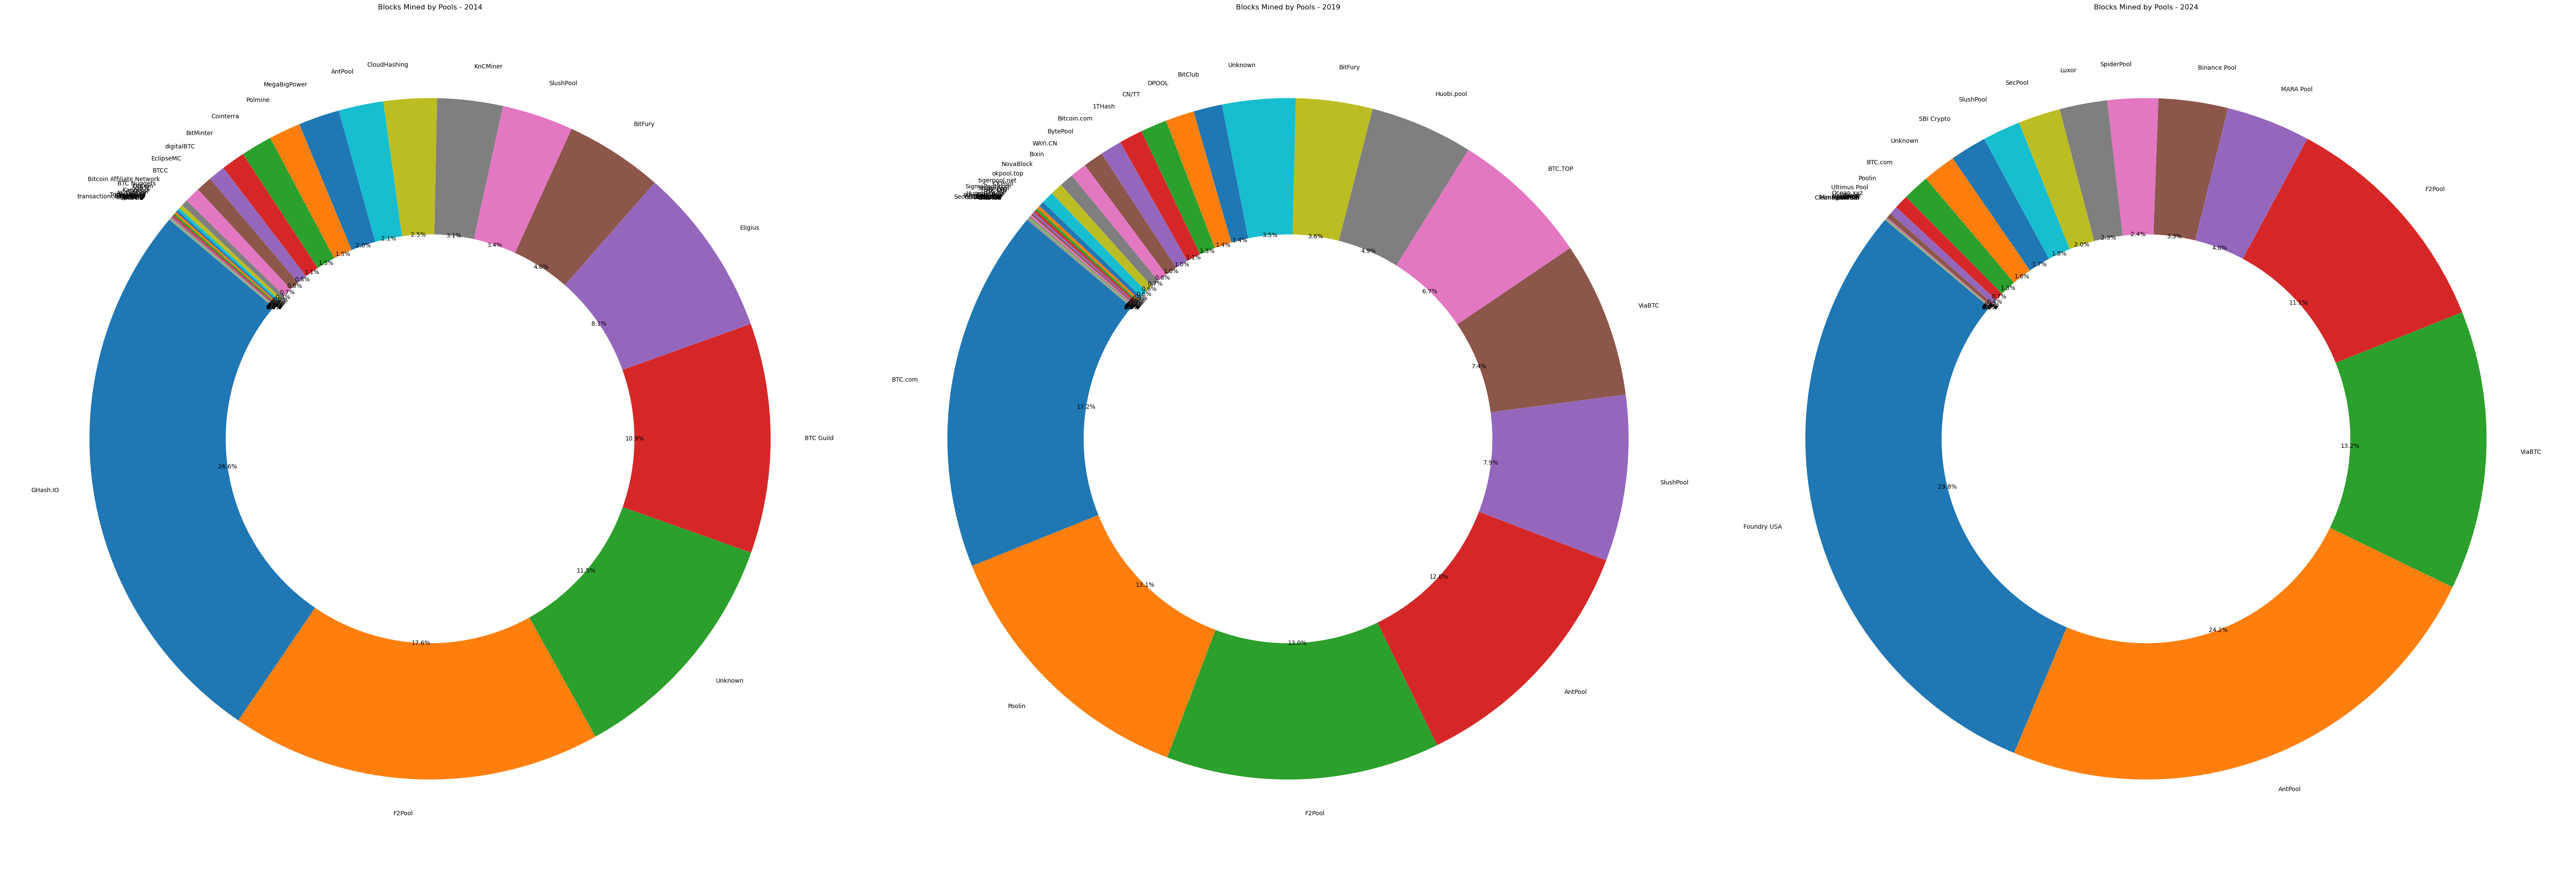

In [49]:
import pandas as pd
import matplotlib.pyplot as plt


# Drop rows with missing values in Miner Pool Name column
df = df.dropna(subset=["Miner Pool Name"])

# Filter data for the years 2014, 2019, and 2024
years_of_interest = [2014, 2019, 2024]
df_filtered = df[df["Year"].isin(years_of_interest)]

# Create a figure with 3 subplots for the three years
fig, axes = plt.subplots(1, 3, figsize=(60, 60))

for i, year in enumerate(years_of_interest):
    # Count blocks mined by each pool in the given year
    pool_block_counts = df_filtered[df_filtered["Year"] == year]["Miner Pool Name"].value_counts()

    # Plot a ring chart (donut chart)
    wedges, texts, autotexts = axes[i].pie(
        pool_block_counts, labels=pool_block_counts.index, autopct='%1.1f%%',
        startangle=140, wedgeprops=dict(width=0.4)
    )

    axes[i].set_title(f"Blocks Mined by Pools - {year}")

# Adjust layout and show the figure
plt.tight_layout()
plt.show()
